<a href="https://colab.research.google.com/github/darkun7/Data-Mining-Notebook/blob/main/Modul%207-Hartawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6 Praktikum Data Mining
## Naïve bayes classification
* Hartawan Bahari Mulyadi
* Student ID: 182410101113


In [ ]:
#@title Initial Import
# Init Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from google.colab import drive
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import sys

sys.path.append('/content/gdrive/MyDrive/Tugas/datmin')
drive.mount('/content/gdrive')

from Darkun7 import pretty_print as ptag
from Darkun7 import stream

auth.authenticate_user() #googlecolab
gauth = GoogleAuth()     #pydrive
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Mounted at /content/gdrive


In [ ]:
stream.file(drive, '1iHDP55GRptXl6FcLfZFhkXrutfHt1yT4', 'titanic.csv')

GoogleDriveFile({'id': '1iHDP55GRptXl6FcLfZFhkXrutfHt1yT4', 'kind': 'drive#file', 'etag': '"MTYxODY0MDIwMDk4NQ"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1iHDP55GRptXl6FcLfZFhkXrutfHt1yT4', 'webContentLink': 'https://drive.google.com/uc?id=1iHDP55GRptXl6FcLfZFhkXrutfHt1yT4&export=download', 'alternateLink': 'https://drive.google.com/file/d/1iHDP55GRptXl6FcLfZFhkXrutfHt1yT4/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1iHDP55GRptXl6FcLfZFhkXrutfHt1yT4/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'titanic.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-04-17T06:16:32.838Z', 'modifiedDate': '2021-04-17T06:16:40.985Z', 'modifiedByMeDate': '2021-04-17T06:16:40.985Z', 'lastViewedByMeDate': '2021-04-17T06:16:32.838Z', 'markedViewedByMeDate': '1970-01-

# Kode 1

In [ ]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [ ]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [ ]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [ ]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
inputs.Age[:20]

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)
ptag.sep('classified')

==============[classified]==============


In [ ]:
X_test = X_test[0:10]
y_test = y_test[0:10]
y_pred = model.predict(X_test[0:10])
y_pred_proba = model.predict_proba(X_test[:10])

# Task

1.	ulangi langkah pada kode 1 untuk dataset iris dan adult. Masing masing gunakan perbandingan 0.2, 0.3, 0.4. tuliskan akurasinya
2.	untuk masing masing dataset carilah subset kombinasi dari attribut yang memeberi hasil klasifikasi lebih baik dari data asli


In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Iris

In [ ]:
stream.file(drive, '1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX', 'iris.csv')
df_iris = pd.read_csv("iris.csv")
target_iris = df_iris.variety
df_iris.head()

GoogleDriveFile({'id': '1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX', 'kind': 'drive#file', 'etag': '"MTYxNjI4MDQwOTgxMg"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX', 'webContentLink': 'https://drive.google.com/uc?id=1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX&export=download', 'alternateLink': 'https://drive.google.com/file/d/1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1wOMtUMDl3QkOIQPBuuivG3DBHmNoC7PX/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'iris.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-03-20T22:46:49.812Z', 'modifiedDate': '2021-03-20T22:46:49.812Z', 'modifiedByMeDate': '2021-03-20T22:46:49.812Z', 'lastViewedByMeDate': '2021-03-21T00:24:33.127Z', 'markedViewedByMeDate': '1970-01-01T

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
def clusterNB(input,target,test_size):
  ptag.sep("Naive Bayes: test-size "+str(test_size*100)+"%")
  X_train, X_test, y_train, y_test = train_test_split(input,target,test_size=test_size, random_state=0)
  model = GaussianNB()
  model.fit(X_train,y_train)
  model.score(X_test,y_test)
  
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)

  cm = confusion_matrix(y_test, y_pred)
  ptag.sep("Confusion Matrix")
  print(cm)

  ptag.sep("Accuracy Score")
  ac = accuracy_score(y_test, y_pred)
  print(ac)
  return {
      "model": model,
      "matrix": cm,
      "x_train": X_train,
      "x_test" : X_test,
      "y_pred": y_pred,
      "y_pred_proba":y_pred_proba
  }

def modelProba(target,y_pred, y_pred_proba):
  ptag.sep("Probability Prediction")
  print(str(pd.unique(target)))
  return list(zip(y_pred,y_pred_proba))

def visualizeModel(Xtrain,Xtest,columns):
  color = ['#003f5c', '#374c80', '#7a5195',
           '#bc5090', '#ef5675', '#ff764a', '#ffa600']
  # lim = plt.axis()
  plt.scatter(Xtrain[columns[0]], Xtrain[columns[1]], c=color[1], s=50, cmap='RdBu')
  plt.scatter(Xtest[columns[0]], Xtest[columns[1]], c=color[2], s=20, cmap='RdBu', alpha=0.2)
  # for _ in columns:
  #   i = list(columns).index(_)
  #   plt.scatter(Xtrain[_], Xtrain[_], c=color[i], s=50, cmap='RdBu')
  #   plt.scatter(Xtest[_], Xtest[_], c=color[i], s=20, cmap='RdBu', alpha=0.2)
  # plt.axis(lim);
  plt.show()

### Test 20%, 30%, 40%

In [ ]:
iris = df_iris.drop(['variety'], axis='columns')
#ALL FEATURES 20%
nb_iris_20 = clusterNB(iris,target_iris, 0.2)
modelProba(target_iris,nb_iris_20["y_pred"],nb_iris_20["y_pred_proba"])

=====[Naive Bayes: test-size 20.0%]=====
===========[Confusion Matrix]===========
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
============[Accuracy Score]============
0.9666666666666667
========[Probability Prediction]========
['Setosa' 'Versicolor' 'Virginica']


[('Virginica', array([1.63380783e-232, 2.18878438e-006, 9.99997811e-001])),
 ('Versicolor', array([1.82640391e-82, 9.99998304e-01, 1.69618390e-06])),
 ('Setosa', array([1.00000000e+00, 7.10250510e-19, 3.65449801e-28])),
 ('Virginica', array([1.58508262e-305, 1.04649020e-006, 9.99998954e-001])),
 ('Setosa', array([1.00000000e+00, 8.59168655e-17, 4.22159374e-27])),
 ('Virginica', array([6.39815011e-321, 1.56450314e-010, 1.00000000e+000])),
 ('Setosa', array([1.00000000e+00, 1.09797313e-16, 5.30276557e-27])),
 ('Versicolor', array([1.25122812e-146, 7.74052109e-001, 2.25947891e-001])),
 ('Versicolor', array([5.34357526e-150, 9.07564955e-001, 9.24350453e-002])),
 ('Versicolor', array([5.67261712e-93, 9.99882109e-01, 1.17891111e-04])),
 ('Versicolor', array([2.38651144e-210, 5.29609631e-001, 4.70390369e-001])),
 ('Versicolor', array([8.12047631e-132, 9.43762575e-001, 5.62374248e-002])),
 ('Versicolor', array([5.25177109e-132, 9.98864361e-001, 1.13563851e-003])),
 ('Versicolor', array([1.2449

In [ ]:
nb_iris_30 = clusterNB(iris,target_iris, 0.3)
ptag.br()
nb_iris_40 = clusterNB(iris,target_iris, 0.4)

=====[Naive Bayes: test-size 30.0%]=====
===========[Confusion Matrix]===========
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
============[Accuracy Score]============
1.0

=====[Naive Bayes: test-size 40.0%]=====
===========[Confusion Matrix]===========
[[16  0  0]
 [ 0 23  0]
 [ 0  4 17]]
============[Accuracy Score]============
0.9333333333333333


### Iris Best Combination Attributes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris,target_iris,test_size=0.4, random_state=0)
efs = EFS(GaussianNB(), min_features=1,max_features=4,scoring='accuracy',cv=5)
efs.fit(X_train,y_train)
ptag.br()
print('Akurasi Tertinggi: %.2f' % efs.best_score_)
print('Fitur Terbaik:', efs.best_feature_names_)

Features: 15/15


Akurasi Tertinggi: 0.98
Fitur Terbaik: ('sepal.length', 'petal.width')


=====[Naive Bayes: test-size 20.0%]=====
===========[Confusion Matrix]===========
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
============[Accuracy Score]============
0.9666666666666667


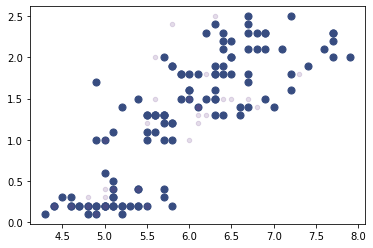

In [ ]:
nb_iris_best = clusterNB(iris[['sepal.length','petal.width']],
                         target_iris, 0.2)
visualizeModel(nb_iris_best["x_train"], nb_iris_best["x_test"], ['sepal.length','petal.width'])

## Adult

In [ ]:
!curl -L -o 'adult.data' "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df_adult = pd.read_csv("/content/adult.data")
df_adult.columns = ['age','workclass','fnlwgt','education','educational-num',
                    'marital-status','occupation','relationship','race','gender',
                    'capital-gain','capital-loss','hours-per-week','native-country','income']
df_adult.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3881k  100 3881k    0     0  20.0M      0 --:--:-- --:--:-- --:--:-- 19.9M


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df_adult.dropna(inplace = True)

In [ ]:
#Checking Variant Features
check = ['workclass','marital-status','occupation','relationship','native-country','race','income']
features = {}
for _ in check:
  features[_] = pd.unique(df_adult[_])
features
# workclass , marital-status, native-country, income

{'income': array([' <=50K', ' >50K'], dtype=object),
 'marital-status': array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
        ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
       dtype=object),
 'native-country': array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
        ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
        ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
        ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
        ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
        ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
        ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
        ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
        ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object),
 'occupation': array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
        ' Other-service', ' 

In [ ]:
# df_adult.loc[(df_adult.income == ' <=50K'),'income']=0
# df_adult.loc[(df_adult.income == ' >50K'),'income']=1
# # df_adult.rename(columns={'income': 'income>50k'}, inplace=True)
# target_adult = df_adult['income']

In [ ]:
adult = df_adult[['age','workclass','educational-num','capital-gain', 'capital-loss','hours-per-week','income']]
dummies = pd.get_dummies(df_adult.gender)
dummies.rename(columns={' Male': 'male'}, inplace=True)
adult = pd.concat([adult,dummies["male"]],axis='columns')

for _ in features['workclass']:
  idx = int( np.where( features['workclass'] == _)[0] )
  df_adult.loc[(df_adult.workclass == _),'workclass'] = idx
adult = pd.concat([adult,df_adult["workclass"]],axis='columns')

for _ in features['marital-status']:
  idx = int( np.where( features['marital-status'] == _)[0] )
  df_adult.loc[(df_adult['marital-status'] == _),'marital-status'] = idx
adult = pd.concat([adult,df_adult["marital-status"]],axis='columns')

for _ in features['native-country']:
  idx = int( np.where( features['native-country'] == _)[0] )
  df_adult.loc[(df_adult['native-country'] == _),'native-country'] = idx
adult = pd.concat([adult,df_adult["native-country"]],axis='columns')

adult

,age,workclass,educational-num,capital-gain,capital-loss,hours-per-week,income,male,workclass,marital-status,native-country
0,50,0,13,0,0,13,<=50K,1,0,0,0
1,38,1,9,0,0,40,<=50K,1,1,1,0
2,53,1,7,0,0,40,<=50K,1,1,0,0
3,28,1,13,0,0,40,<=50K,0,1,0,1
4,37,1,14,0,0,40,<=50K,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,12,0,0,38,<=50K,0,1,0,0
32556,40,1,9,0,0,40,>50K,1,1,0,0
32557,58,1,9,0,0,40,<=50K,0,1,6,0
32558,22,1,9,0,0,20,<=50K,1,1,3,0


In [ ]:
adult_sample = adult.sample(frac = 0.01, replace = False, random_state=1)
new_target_adult = adult_sample['income']
new_adult = adult_sample.drop('income', axis='columns')

### Test 20%, 30%, 40%

In [ ]:
nb_adult_20 = clusterNB(new_adult,new_target_adult, 0.2)
ptag.br()
nb_adult_30 = clusterNB(new_adult,new_target_adult, 0.3)
ptag.br()
nb_adult_40 = clusterNB(new_adult,new_target_adult, 0.4)

=====[Naive Bayes: test-size 20.0%]=====
===========[Confusion Matrix]===========
[[52  4]
 [ 8  2]]
============[Accuracy Score]============
0.8181818181818182

=====[Naive Bayes: test-size 30.0%]=====
===========[Confusion Matrix]===========
[[76  4]
 [12  6]]
============[Accuracy Score]============
0.8367346938775511

=====[Naive Bayes: test-size 40.0%]=====
===========[Confusion Matrix]===========
[[100   5]
 [ 16  10]]
============[Accuracy Score]============
0.8396946564885496


### Adult Best Combination Attributes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_adult,new_target_adult,test_size=0.4, random_state=0)
efs = EFS(GaussianNB(), min_features=1,max_features=4,scoring='accuracy',cv=5)
efs.fit(X_train,y_train)
print('Akurasi Tertinggi: %.2f' % efs.best_score_)
print('Fitur Terbaik:', efs.best_feature_names_)

Features: 385/385

Akurasi Tertinggi: 0.87
Fitur Terbaik: ('age', 'educational-num', 'hours-per-week', 'male')


=====[Naive Bayes: test-size 40.0%]=====
===========[Confusion Matrix]===========
[[95 10]
 [ 6 20]]
============[Accuracy Score]============
0.8778625954198473


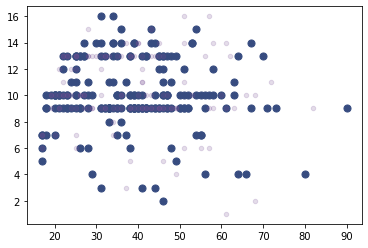

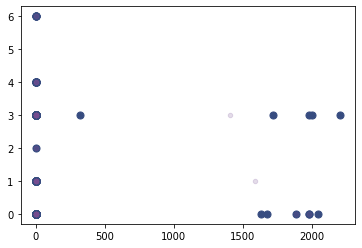

In [ ]:
nb_adult_best = clusterNB(new_adult[['age', 'educational-num', 'capital-loss', 'marital-status']], new_target_adult, 0.4)
visualizeModel(nb_adult_best["x_train"], nb_adult_best["x_test"], ['age','educational-num'])
visualizeModel(nb_adult_best["x_train"], nb_adult_best["x_test"], ['capital-loss','marital-status'])